# White Island eruption Dec 9, 2019

In [4]:
import os
import sys
from obspy.core import UTCDateTime
LIBpath = os.path.join( os.getenv('HOME'),'Documents','GitHub','kitchensinkGT', 'LIB')
sys.path.append(LIBpath)
import obspyGT.RSAM

searchRadiusDeg = 0.25
centerlatWI=-37.52
centerlonWI=177.1825
starttWI = UTCDateTime("2019-12-01T00:00:00.000")
endtWI = UTCDateTime("2019-12-11T00:00:00.000")
SDS_TOP='SDS'

In [ ]:
obspyGT.RSAM.fdsn_daily_wrapper(starttWI, endtWI, SDS_TOP, centerlatWI, centerlonWI, searchRadiusDeg, fdsnURL="GEONET", channel='HHZ')

In [ ]:
import importlib
importlib.reload(obspyGT.RSAM)

In [13]:
rsamWI = obspyGT.RSAM.RSAMobj()
rsamWI.read(starttWI, endtWI, SDS_TOP, metric='mean', speed=1, corrected=True)

st = read("SDS/CSAM/mean/2019/NZ/WIZ/HHZ.D/NZ.WIZ.10.HHZ.D.2019.343")
st = read("SDS/CSAM/mean/2019/NZ/WIZ/HHZ.D/NZ.WIZ.10.HHZ.D.2019.335")
st = read("SDS/CSAM/mean/2019/NZ/WIZ/HHZ.D/NZ.WIZ.10.HHZ.D.2019.342")
st = read("SDS/CSAM/mean/2019/NZ/WIZ/HHZ.D/NZ.WIZ.10.HHZ.D.2019.339")
st = read("SDS/CSAM/mean/2019/NZ/WIZ/HHZ.D/NZ.WIZ.10.HHZ.D.2019.344")
st = read("SDS/CSAM/mean/2019/NZ/WIZ/HHZ.D/NZ.WIZ.10.HHZ.D.2019.340")
st = read("SDS/CSAM/mean/2019/NZ/WIZ/HHZ.D/NZ.WIZ.10.HHZ.D.2019.338")
st = read("SDS/CSAM/mean/2019/NZ/WIZ/HHZ.D/NZ.WIZ.10.HHZ.D.2019.337")
st = read("SDS/CSAM/mean/2019/NZ/WIZ/HHZ.D/NZ.WIZ.10.HHZ.D.2019.336")
st = read("SDS/CSAM/mean/2019/NZ/WIZ/HHZ.D/NZ.WIZ.10.HHZ.D.2019.341")
st = read("SDS/CSAM/mean/2019/NZ/WSRZ/HHZ.D/NZ.WSRZ.10.HHZ.D.2019.339")
st = read("SDS/CSAM/mean/2019/NZ/WSRZ/HHZ.D/NZ.WSRZ.10.HHZ.D.2019.343")
st = read("SDS/CSAM/mean/2019/NZ/WSRZ/HHZ.D/NZ.WSRZ.10.HHZ.D.2019.342")
st = read("SDS/CSAM/mean/2019/NZ/WSRZ/HHZ.D/NZ.WSRZ.10.HHZ.D.2019.340")
st = read("S

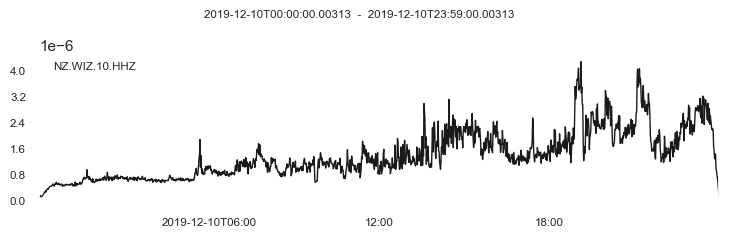

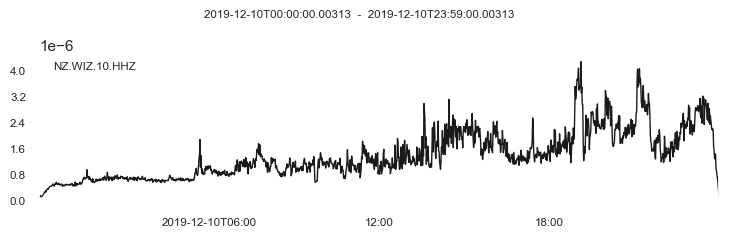

In [5]:
from obspy.core import read
st1 = read("SDS/CSAM/mean/2019/NZ/WIZ/HHZ.D/NZ.WIZ.10.HHZ.D.2019.344")
st1.plot()

In [ ]:
rsamWI.stream[0].plot()

In [ ]:
rsamWI.plot()

2 Trace(s) in Stream:
NZ.WIZ.10.HHZ  | 2019-12-01T00:00:00.003134Z - 2019-12-10T23:59:00.003134Z | 60.0 s, 14400 samples
NZ.WSRZ.10.HHZ | 2019-12-01T00:00:00.003134Z - 2019-12-10T23:59:00.003134Z | 60.0 s, 14400 samples


0

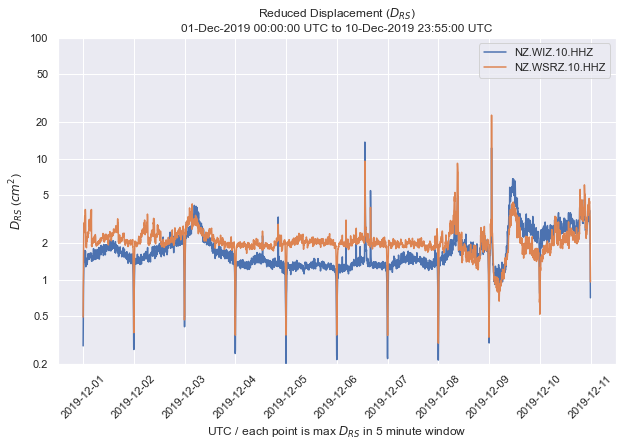

In [34]:
drsWI = obspyGT.RSAM.ReducedDisplacementObj()
drsWI.read(starttWI, endtWI, SDS_TOP, metric='median', speed=2)
drsWI.plot(type='log')

[14.398035230407565, 24.066145351844877]
[4.55121723 4.2988531 ]


0

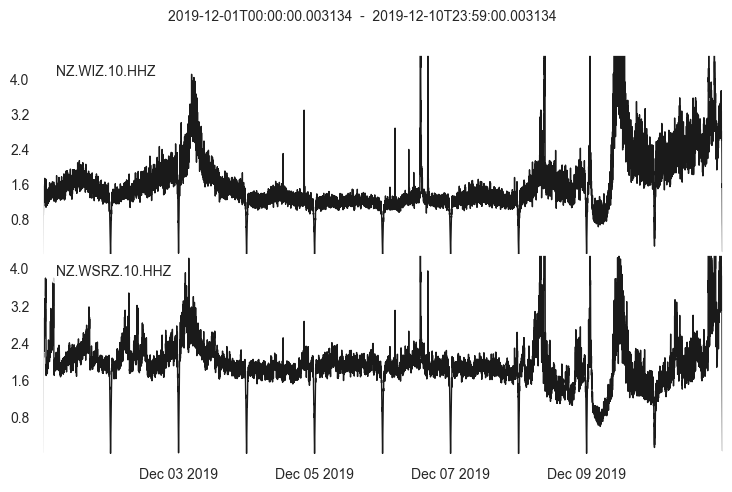

In [38]:
drsWI.plot(type='linear', percentile=99)

2019-12-01T00:00:00.000000Z
2019-12-02T00:00:00.000000Z
2019-12-03T00:00:00.000000Z
2019-12-04T00:00:00.000000Z
2019-12-05T00:00:00.000000Z
2019-12-06T00:00:00.000000Z
2019-12-07T00:00:00.000000Z
2019-12-08T00:00:00.000000Z
2019-12-09T00:00:00.000000Z
2019-12-10T00:00:00.000000Z


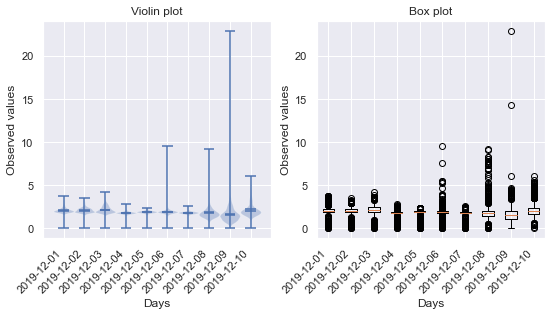

In [37]:
# Break into dayplots

def Trace_to_bins(tr, binsizeSecs=86400):
    startt = tr.stats.starttime
    endt = tr.stats.endtime
    windowstart = UTCDateTime(startt.year, startt.month, startt.day, 0, 0, 0)
    binstarts = []
    bins = []
    while windowstart < endt:
        print(windowstart)
        binstarts.append(windowstart)
        bins.append(tr.copy().trim(starttime=windowstart, endtime=windowstart+binsizeSecs).data)
        windowstart += binsizeSecs
    return bins, binstarts
    
bins, binstarts = Trace_to_bins(drsWI.stream[1])


def rsam_violinplot(bins, binstarts, ymax=None):
    import matplotlib.pyplot as plt

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

    all_labels = [t.strftime('%Y-%m-%d') for t in binstarts]
    

    # plot violin plot
    axs[0].violinplot(bins,
                  showmeans=True,
                  showmedians=True, showextrema=True, widths=0.99)
    axs[0].set_title('Violin plot')


    # plot box plot
    axs[1].boxplot(bins)
    axs[1].set_title('Box plot')
        
    # adding horizontal grid lines
    for ax in axs:
        ax.yaxis.grid(True)
        ax.set_xticks([y + 1 for y in range(len(bins))],
                  labels=all_labels, rotation=45, ha='right')
        ax.set_xlabel('Days')
        ax.set_ylabel('Observed values')
        
        # set ymax if asked
        if ymax:
            ax.set_ylim([0,ymax])
            
    plt.show()    
    
rsam_violinplot(bins, binstarts)

In [26]:
import pandas as pd
def stream2dataframe(st):
    t = pd.Series(this_utcdt.datetime for this_utcdt in st[0].times(type="utcdatetime"))
    df = pd.DataFrame(t,columns=['UTCDateTime'])
    for tr in st:
        df[tr.id] = tr.data
    return df
df = stream2dataframe(rsamWI.stream)
print(df)

                     UTCDateTime  NZ.WIZ.10.HHZ  NZ.WSRZ.10.HHZ
0     2019-12-01 00:00:00.003134   3.152903e-08    1.956427e-07
1     2019-12-01 00:01:00.003134   8.613269e-08    5.282656e-07
2     2019-12-01 00:02:00.003134   1.579402e-07    9.690437e-07
3     2019-12-01 00:03:00.003134   1.945502e-07    1.153544e-06
4     2019-12-01 00:04:00.003134   2.680201e-07    1.465383e-06
...                          ...            ...             ...
14395 2019-12-10 23:55:00.003134   6.793607e-07    1.864059e-06
14396 2019-12-10 23:56:00.003134   5.748253e-07    1.425321e-06
14397 2019-12-10 23:57:00.003134   3.578210e-07    1.033115e-06
14398 2019-12-10 23:58:00.003134   2.480551e-07    7.191159e-07
14399 2019-12-10 23:59:00.003134   7.932685e-08    2.159335e-07

[14400 rows x 3 columns]
